In [40]:
!pip install pillow

import PIL
from PIL import Image


In [41]:
# 이미지를 인터넷에서 다운로드 받기 위한 편한 방법.
!pip install -Uq duckduckgo_search
import duckduckgo_search
duckduckgo_search.__version__

'8.0.1'

In [ ]:
from duckduckgo_search import DDGS
import requests
from io import BytesIO
from PIL import Image

def search_images(keywords, max_images=3) -> list[str]:
    result = DDGS().images(keywords, max_results=max_images)
    urls = [x.get('image') for x in result]
    return urls
def download_image(url) -> Image:
    response = requests.get(url)
    return Image.open(BytesIO(response.content))


In [43]:
urls = search_images('korea')
print(urls[0])

https://fthmb.tqn.com/SEDbCCs6BRa3Qn0BTPLyKWS074Y=/3865x2576/filters:fill(auto,1)/old-fortress-gate-with-light-trails-at-downtown-455242307-58dea6143df78c5162e1ff3d.jpg


In [44]:
# 테스트를 하다 보면 ddg search 에서 RatelimitException 이 쉽게 발생함.
# 그럴 경우에는 그냥 구글링 해서 url 가져다 붙이자!
urls = [ 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0ysY89XazxccqVAMmbDBRsxC2Ox_Odl2Vyg&s' ]

In [ ]:
# @hidden
# 다운로드 테스트 & 디버깅
response = requests.get(urls[0])

print(response.__dict__.keys())
print(type(response.headers))
# print(response.headers)
print(response.headers['Content-Type'])


dict_keys(['_content', '_content_consumed', '_next', 'status_code', 'headers', 'raw', 'url', 'encoding', 'history', 'reason', 'cookies', 'elapsed', 'request', 'connection'])
<class 'requests.structures.CaseInsensitiveDict'>
image/jpeg


In [45]:
img = download_image(urls[0])
print(type(img))
# PIL.JpegImagePlugin.JpegImageFile


<class 'PIL.JpegImagePlugin.JpegImageFile'>


 JPEG (275, 183) 275 183 RGB


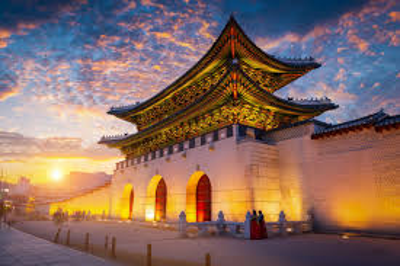

In [46]:
# img.show()
print(img.filename, img.format, img.size, img.width, img.height, img.mode)

ratio = 400/img.size[0]
img_resized = img.resize((400,int(img.height*ratio)))
img_resized